#### 0.0 Simulate phone dataset 
##### a) Use numpy.random.normal() to simulate a dataset with the following requirements:
###### Detta simulerar 400 x-värden från en normalfördelning med medelvärdet 100 och standardavvikelsen 100. Därefter tas absolutvärdet av dessa x-värden. Sedan simuleras 400 brusvärden från en normalfördelning med medelvärdet 0 och standardavvikelsen 50. Slutligen beräknas y-värdena enligt formeln y = 2x + 25 + brus. Datamängden plottas sedan med x-värdena på x-axeln och y-värdena på y-axeln.

Number of points x ≥ 300 min: 11
Number of points y < 0 kr: 8


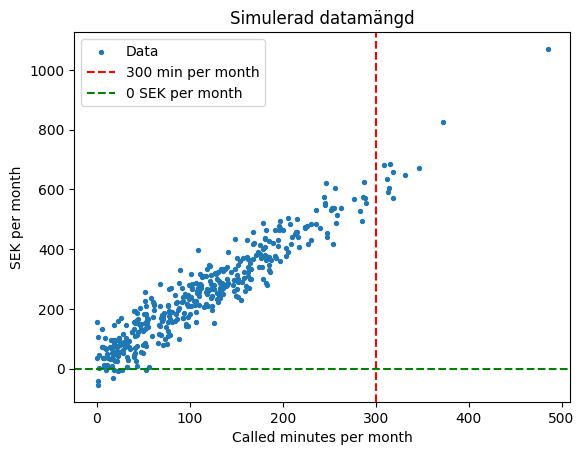

In [175]:
import numpy as np
import matplotlib.pyplot as plt

#sätt seed för reproducerbarhet
np.random.seed(42)

# simulerar 400 x-värden från en normalfördelning med mededlvärdet 100 och standardavvikelsen 100
X = np.random.normal(loc=100, scale=100, size=400)

# Ta absolutvärdet av x-värdena
x_abs = np.abs(X)

# Simulerar 400 brusvärden från en normalfördelning med medelvärdet 0 och standardavvikelsen 50
noise = np.random.normal(loc=0, scale=50, size=400)

# Låt y = 2x + 25 + brus(€)
y = 2 * x_abs + 25 + noise

# Beräkning av värden som är under eller lika med 300 och över 0
print("Number of points x ≥ 300 min:", np.sum(x_abs >= 300))
print("Number of points y < 0 kr:", np.sum(y < 0))

# Plottar datamängden
plt.scatter(x_abs, y, s=8, label="Data")
plt.axvline(x=300, color='red', linestyle='--', label="300 min per month")
plt.axhline(y=0, color='green', linestyle='--', label="0 SEK per month")
plt.xlabel("Called minutes per month")
plt.ylabel("SEK per month")
plt.title("Simulerad datamängd")
plt.legend()
plt.show()



##### 0.0 b) Now we want to remove some outliers according to this assumption:

Length of x, outliers removed: 400
Length of y, outliers removed: 381


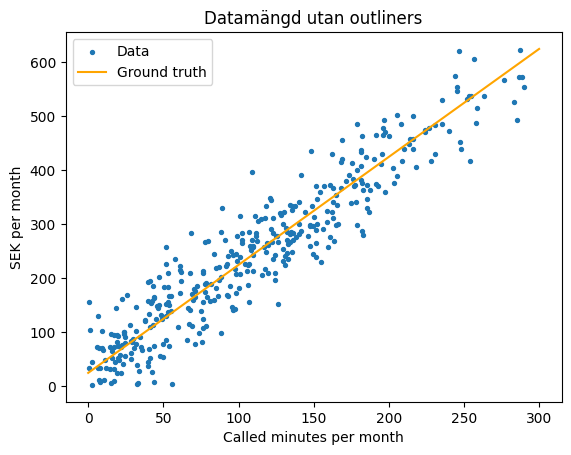

In [176]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Ta bort outliers
filter = (x_abs <= 300)&(y >= 0)
X = x_abs[filter]
y = y[filter]

print("Length of x, outliers removed:", len(x_abs))
print("Length of y, outliers removed:", len(y))

# Plotta den nya datamängden
plt.scatter(X, y, s=8, label="Data")
plt.xlabel("Called minutes per month")
plt.ylabel("SEK per month")
plt.title("Datamängd utan outliners")

# Plotta ground truth med de sanna parametrarna
x_true = np.linspace(0, 300, 100)
y_true = 25 + 2 * x_true
plt.plot(x_true, y_true, color="orange", label="Ground truth")
plt.legend()
plt.show()


#### 0.0 c) Insert the values into a DataFrame

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Skapa en DataFrame
df = pd.DataFrame({
    "Minutes": X,
    "Cost": y
})

print(df.head())


      Minutes        Cost
0  149.671415  244.621448
1   86.173570  167.378389
2  164.768854  354.799893
3  252.302986  531.955001
4   76.584663  155.666051


#### 1. Train|test split
##### Before moving on with linear regression we shall first perform a train-test-split.
##### a) Create a train-test-split function with the following call signature:

In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts

def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float = 0.7, random_state: int = 42, replace: bool = False) -> tuple:
    X_train, X_test, y_train, y_test = tts(X, y, train_size=train_fraction, random_state=random_state, shuffle=not replace)
    return X_train, X_test, y_train, y_test


##### 1b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly

In [179]:
df = pd.DataFrame({
    "Minutes": X,
    "Cost": y
})

# Dela upp data i en träningssats och en testssats
X_train, X_test, y_train, y_test = train_test_split(df[["Minutes"]], df[["Cost"]])

# Kontrollera att spliten är korrekt
print(f"Träningssatsens storlek:, {len(X_train)}")
print(f"Testsatsens storlek:, {len(X_test)}")
print(f"Träningssatsens målvärden:, {len(y_train)}")
print(f"Testsatsens målvärden:, {len(y_test)}")

Träningssatsens storlek:, 266
Testsatsens storlek:, 115
Träningssatsens målvärden:, 266
Testsatsens målvärden:, 115


##### 2. Simple linear regression with normal equation

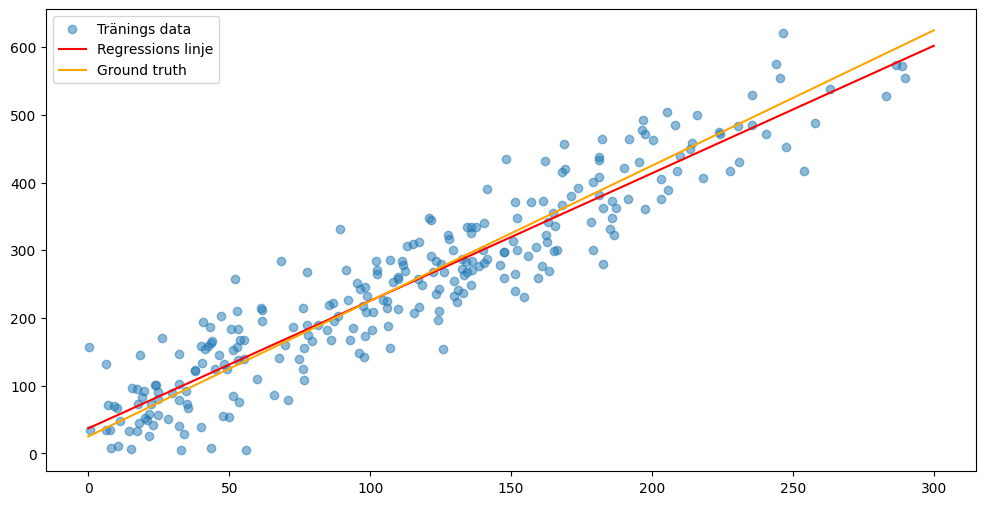

Beräkna koefficienterna:
ß0 (intercept): 36.90
ß1 (lutning): 1.88


In [180]:
import numpy as np
import matplotlib.pyplot as plt


# Lägg till en kolumn med 1:or för att representera bias-termen
X = np.column_stack([np.ones(len(X_train)), X_train["Minutes"]])
y = y_train["Cost"].values

# Beräkna beta-koefficienterna med normal ekvation
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Skapa prediktioner för plotten
x_plot = np.linspace(0, 300, 100)
y_pred = beta[0] + beta[1] * x_plot

plt.figure(figsize=(12, 6))

# Plotta träningssatsen
plt.scatter(X_train["Minutes"], y_train["Cost"], alpha=0.5, label="Tränings data")

# Plotta regressionslinjen
plt.plot(x_plot, y_pred, color="red", label="Regressions linje")

# Plotta Ground Truth/ x_true kommer från uppgift 00b).
plt.plot(x_true, 2 * x_true + 25, color="orange", label="Ground truth")

plt.legend()
plt.show()

print(f"Beräkna koefficienterna:")
print(f"ß0 (intercept): {beta[0]:.2f}")
print(f"ß1 (lutning): {beta[1]:.2f}")


#### 3. Prediction and evaluation
##### a) Use your model to make prediction on testing data. Plot the prediction cost against X_test, and y_test against X_test.

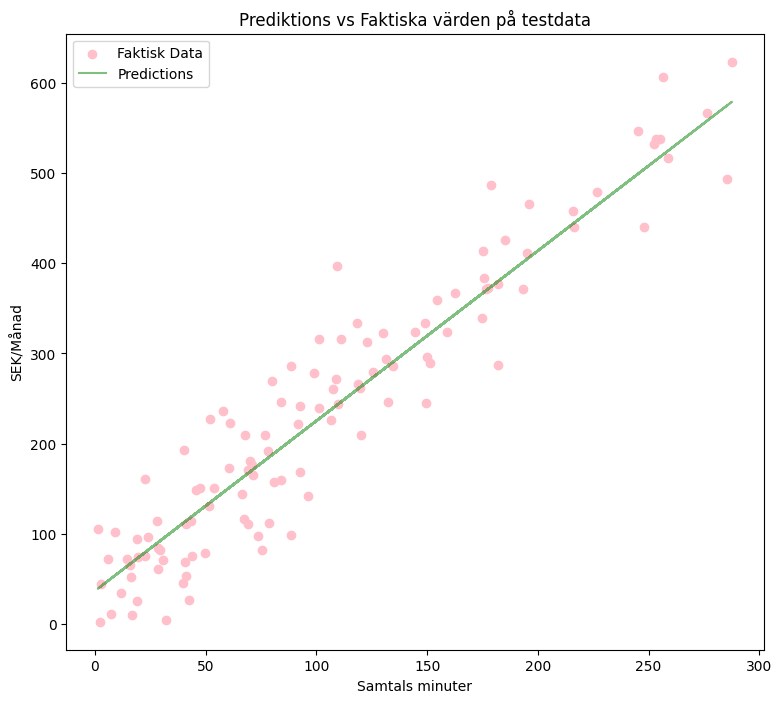

In [181]:
# Skapa design matrix för testdata
X_test_matrix = np.column_stack([np.ones(len(X_test)), X_test["Minutes"]])

# Gör prediktioner med våra beräknade beta-koefficienter
y_pred = X_test_matrix @ beta

# Plotta prediktionerna med faktiska värden
plt.figure(figsize=(9, 8))
plt.scatter(X_test["Minutes"], y_test["Cost"], color="Pink", label="Faktisk Data")
plt.plot(X_test["Minutes"], y_pred, color="green", alpha=0.5, label="Predictions")
plt.title("Prediktions vs Faktiska värden på testdata")
plt.xlabel("Samtals minuter")
plt.ylabel("SEK/Månad")
plt.legend()
plt.show()

#### 3B) Calculate MAE, MSE, RMSE 

#### * MAE står för Mean Absolute Error, vilket är ett mått på hur bra en modell presterar på en uppgift.
MAE beräknas genom att ta absoluta differensen mellan förutsagda värden och verkliga värden, och sedan ta medelvärdet av dessa differenser.

##### Formeln för MAE är:
MAE = (1/n) * ∑|y_true - y_pred|

där:

y_true är de verkliga värdena
y_pred är de förutsagda värdena
n är antalet observationer

#### * MSE står för Mean Squared Error, vilket är ett annat mått på hur bra en modell presterar på en uppgift.
MSE beräknas genom att ta kvadraten på differensen mellan förutsagda värden och verkliga värden, och sedan ta medelvärdet av dessa kvadrerade differenser.

##### Formeln för MSE är:
MSE = (1/n) * ∑(y_true - y_pred)^2

där:

y_true är de verkliga värdena
y_pred är de förutsagda värdena
n är antalet observationer

#### * RMSE står för Root Mean Squared Error, vilket är kvadratroten av MSE (Mean Squared Error).

##### Formeln för RMSE är:
RMSE = √MSE = √((1/n) * ∑(y_true - y_pred)^2)

där:

y_true är de verkliga värdena
y_pred är de förutsagda värdena
n är antalet observationer

In [182]:
# Beräkna MAE, MSE, RMSE

def mae(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    # Beräkna Mean Absolute Error
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    # Beräkna Mean squared Error
    return np.mean((y_true - y_pred)**2)

def rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    # Beräkna Root Mean Squarred Error
    return np.sqrt(mse(y_true, y_pred))

# Konvertera till numpy arrays för undvikanden av dimensionsproblem
y_test_values = y_test["Cost"].values
y_pred = y_pred.flatten() # Säkerställande att y_pred har rätt dimension

# Beräkna utvärderingsmåtten
mae_result = mae(y_test_values, y_pred)
mse_result = mse(y_test_values, y_pred)
rmse_result = rmse(y_test_values, y_pred)

print(f"Utvärderingsmått på testdata:")
print(f"MAE: {mae_result:.2f}")
print(f"MSE: {mse_result:.2f}")
print(f"RMSE: {rmse_result:.2f}")


Utvärderingsmått på testdata:
MAE: 37.51
MSE: 2385.18
RMSE: 48.84


#### 4. Simulate more explanatory variables

Now we will simulate the explanatory variables for minutes, text messages and amount of surf. For reference and reproducibility use numpy random seed 42. Assume there is:
- mean start cost: 25kr
- mean cost per minute: 2kr
- mean cost per sms: 50 öre
- mean cost per GB: 50kr

##### a) Simulate 10000 samples of each of X1, X2, X3 and Y and save them in a DataFrame. Also add an intercept column containing ones.

In [183]:
import numpy as np
import pandas as pd

# Sätter seed 42 för reproducerbarhet
np.random.seed(42)

# Antal sampel, (slumpmässigt genererade värden från en normalfördelning.)
n_sample = 10000

# Simulera X1, X2, X3. 
# x_1 = Medelvärde 100, standardavvikelsen = kvadratroten av variansen (100). np.abs() beräknar absolutvärdet av varje element i arrayen.
# x_2 = diskret uniform fördelning mellan 0 och 50, genererar slumpmässiga värden. Varje värde i arrayen är ett heltal. 
# Vill vi ha kontinuerlig uniform fördelning mellan 0 och 50, där varje värde i arrayen kan vara ett decimaltal = np.random.uniform(0, 50, n_sample)
# Vill vi ha diskret uniform fördelning mellan 0 och 50, där varje värde i arrayen är ett heltal = np.random.choice(np.arange(0, 51), n_samples)
# x_3 = Slumpmässigt genererade värden från en normalfördelning med medelvärdet 0 och standardavvikelsen 2. Värdena kan vara positiva eller negativa. np.abs() tar absolutvärdet av varje värde i arrayen, vilket innebär att alla negativa värden blir positiva.
x_1 = np.abs(np.random.normal(100, np.sqrt(100), n_sample))
x_2 = np.random.uniform(0, 50, n_sample)
x_3 = np.abs(np.random.normal(0, 2, n_sample))

# Simulera feltermen ε ~ 𝒩(0, 50)
epsilon = np.random.normal(0, 50, n_sample)

# Beräkna y enligt modellen: y = 25 + 2x1 +0.5x2 + 50x3 + ε 
y = 25 + 2 * x_1 + 0.5 * x_2 + 50 * x_3 + epsilon

# Skapa DataFrame 
data = pd.DataFrame({"x_1": x_1, "x_2": x_2, "x_3": x_3, "y": y})

# Lägg till intercept-kolumn med ettor
data['intercept'] = 1

# Skapa DataFrame med önskade kolumner
df = pd.DataFrame({
    "Intercept": data["intercept"],
    "Minuter": data["x_1"],
    "SMS": data["x_2"],
    "Surf (GB)": data["x_3"],
    "Kostnad": data["y"]
})

# Visa de första raderna av DataFrame
# Kombinera första och sista rader i en snygg utskrift
print(pd.concat([df.head(2), pd.DataFrame([['...']*len(df.columns)], columns=df.columns), df.tail(2)]))


     Intercept     Minuter        SMS Surf (GB)     Kostnad
0            1  104.967142  16.062759  0.958919  307.853958
1            1   98.617357    5.15096  2.056136  307.772968
0          ...         ...        ...       ...         ...
9998         1  104.957656  37.691313  1.013816  368.795384
9999         1  106.443885  44.067762   3.16303    428.9165


#### b) Make histograms for each of the explanatory variables X1, X2, X3 and the response variable y.


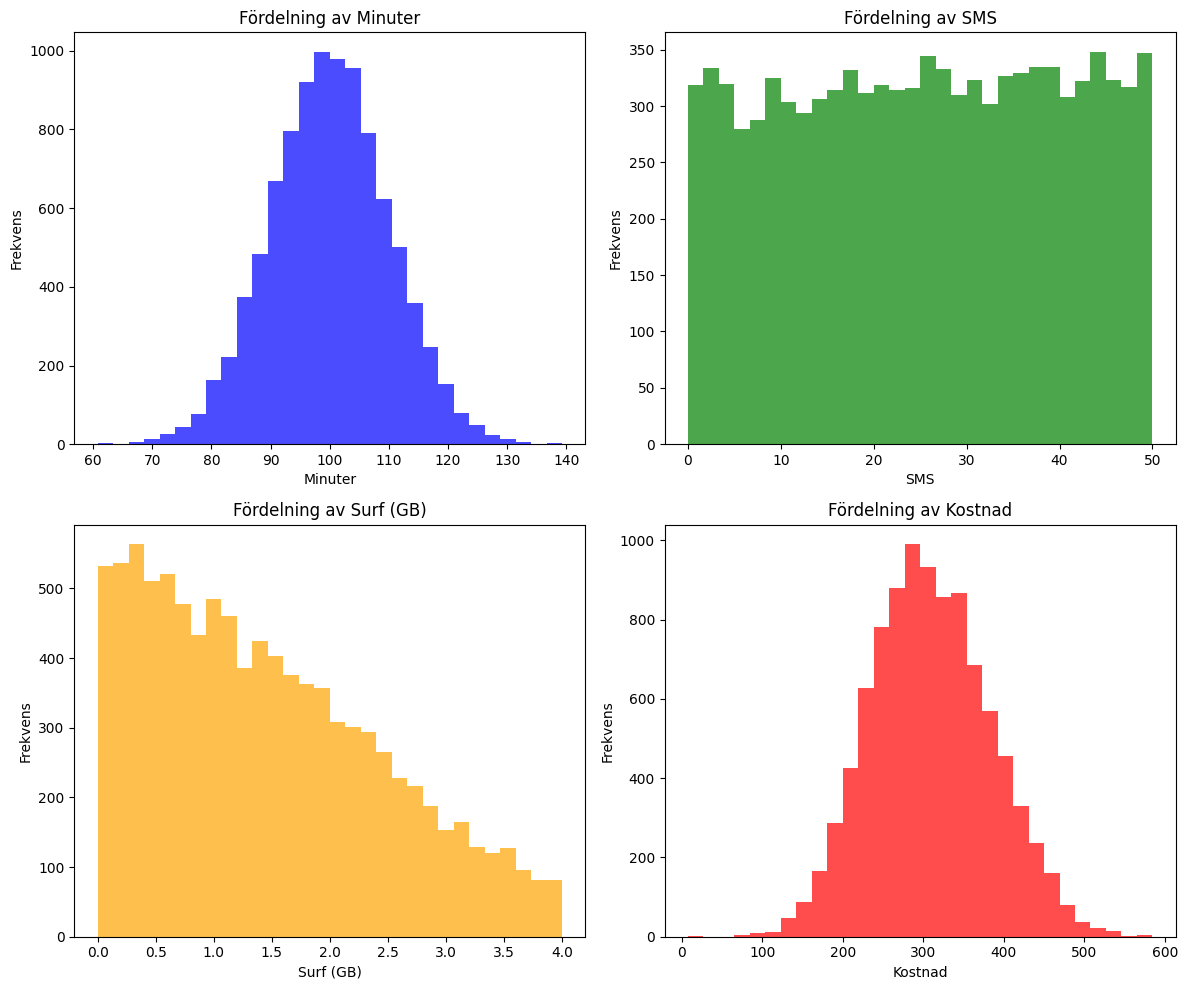

Antal rader före filtrering: 10000
Antal rader efter filtrering: 9580
Procent av data som behållits: 95.80%


In [184]:
import matplotlib.pyplot as plt

# Skapa mask för filtrering
mask = (data['x_3'] < 4) & (data['x_1'] < 300) & (data['y'] > 0)
filtered_data = data[mask]

# Skapa en figur med 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Rita histogram för x_1 (Minuter)
axes[0, 0].hist(filtered_data['x_1'], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('Fördelning av Minuter')
axes[0, 0].set_xlabel('Minuter')
axes[0, 0].set_ylabel('Frekvens')

# Rita histogram för x_2 (SMS)
axes[0, 1].hist(filtered_data['x_2'], bins=30, color='green', alpha=0.7)
axes[0, 1].set_title('Fördelning av SMS')
axes[0, 1].set_xlabel('SMS')
axes[0, 1].set_ylabel('Frekvens')

# Rita histogram för x_3 (Surf (GB))
axes[1, 0].hist(filtered_data['x_3'], bins=30, color='orange', alpha=0.7)
axes[1, 0].set_title('Fördelning av Surf (GB)')
axes[1, 0].set_xlabel('Surf (GB)')
axes[1, 0].set_ylabel('Frekvens')

# Rita histogram för y (Kostnad)
axes[1, 1].hist(filtered_data['y'], bins=30, color='red', alpha=0.7)
axes[1, 1].set_title('Fördelning av Kostnad')
axes[1, 1].set_xlabel('Kostnad')
axes[1, 1].set_ylabel('Frekvens')

# Justera layouten
plt.tight_layout()

# Visa figurerna
plt.show()

# Visa antal rader före och efter filtrering
print(f"Antal rader före filtrering: {len(data)}")
print(f"Antal rader efter filtrering: {len(filtered_data)}")
print(f"Procent av data som behållits: {(len(filtered_data)/len(data))*100:.2f}%")

#### 5. Multiple linear regression
a) Perform a train|test split with 0.8 of the data for training

### Förklaring av Träning/Test-Dela Kod
Denna kod utför en träning/test-delning av en dataset för att förbereda den för modellträning och utvärdering.

1. **Importera Nödvändiga Bibliotek**:
   ```python
   from sklearn.model_selection import train_test_split

2. **Definiera Datan**:
* X definieras som en DataFrame som innehåller "Minuter", vilket är den förklarande variabeln.
* y definieras som "Kostnad", vilket är målvariabeln.

3. **Dela Upp Datan**:
* train_test_split används för att dela upp datan i tränings- och testset, där 80% av datan används för träning (train_size=0.8).
* random_state=42 säkerställer att uppdelningen är reproducerbar.

Sammanfattning:
Denna kod är en grundläggande del av maskininlärning där datan delas upp i tränings- och testset för att möjliggöra effektiv träning och utvärdering av en modell.

In [185]:
from sklearn.model_selection import train_test_split

# Anta att df är din DataFrame och 'Kostnad' är målet
X = df[['Minuter']]  # Använd 'Minuter' som förklarande variabel
y = df['Kostnad']    # Målvariabel

# Dela upp datan
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Skriv ut längden på tränings- och testdata
print(f"Träningsdata storlek: {X_train.shape[0]}")
print(f"Testdata storlek: {X_test.shape[0]}")


Träningsdata storlek: 8000
Testdata storlek: 2000


#### b) Use the normal equation to compute $\hat{\beta}$
Här beräknas koefficienterna med normalekvationen, där X_train_with_intercept innehåller en kolumn av ettor för interceptet och "Minuter" som den enda förklarande variabeln.
* Resultatet [114.19555438, 2.01849911] innebär att:
  * Intercept: 114.20 (det förväntade värdet av "Kostnad" när "Minuter" är 0).
  * Koefficient för "Minuter": 2.02 (för varje enhetsökning i "Minuter" ökar "Kostnad"
  med cirka 2.02).

In [186]:
import numpy as np
from sklearn.model_selection import train_test_split

# Anta att df är din DataFrame med 'Minuter' och 'Kostnad'
X = df[['Minuter']]  # Förklarande variabel
y = df['Kostnad']    # Målvariabel

# Dela upp datan i tränings- och testset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Lägg till en kolumn av ettor för intercept
X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]

# Beräkna beta med normalekvationen
beta_hat = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ (X_train_with_intercept.T @ y_train)

# Visa resultatet
print("Beräknade koefficienter (beta):", beta_hat)

Beräknade koefficienter (beta): [116.46855104   1.98465701]


#### Annat exempel på uppgift 5a) och 5b)

In [187]:
import numpy as np

# df = pd.DataFrame({'Minuter': x_filtered, 'Kostnad': y_filtered})

# Blanda datan för att säkerställa att den är slumpmässigt fördelad
df = df.sample(frac=1, random_state=42)

# Beräkna antalet rader för träningsdata
train_size = int(0.8 * len(df))

# Dela upp datan i tränings- och testset
X_train = df[['Minuter']].iloc[:train_size]
X_test = df[['Minuter']].iloc[train_size:]
y_train = df[['Kostnad']].iloc[:train_size]
y_test = df[['Kostnad']].iloc[train_size:]

# Skriv ut längden på tränings- och testdata
print(f"Längd av X_train: {len(X_train)}")
print(f"Längd av X_test: {len(X_test)}")
print(f"Längd av y_train: {len(y_train)}")
print(f"Längd av y_test: {len(y_test)}")

# Kontrollera att tränings- och testdata inte överlappar
train_indices = X_train.index
test_indices = X_test.index
overlap = set(train_indices).intersection(set(test_indices))
print(f"Överlappande index mellan tränings- och testdata: {overlap}")

Längd av X_train: 8000
Längd av X_test: 2000
Längd av y_train: 8000
Längd av y_test: 2000
Överlappande index mellan tränings- och testdata: set()


In [188]:
import numpy as np

# Lägg till en kolumn med ettor för interceptet
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Beräkna koefficienterna med normalekvationen
beta_hat = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

print(f"Beräknade koefficienter (beta_hat): \n{beta_hat}")

Beräknade koefficienter (beta_hat): 
      Kostnad
0  117.080377
1    1.991683


#### C) Predict on the test data and compute MAE, MSE and RMSE

In [189]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Lägg till en kolumn med ettor för interceptet i testdatan
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Gör förutsägelser på testdatan
y_pred = X_test_b @ beta_hat

# Beräkna MAE, MSE och RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 63.905248816391975
Mean Squared Error (MSE): 6442.205658183149
Root Mean Squared Error (RMSE): 80.26335189975029
